# 🔬 Scikit-learn

Scikit-learn (sklearn) is a free software machine learning library for Python. Built on top of NumPy, SciPy, and Matplotlib, it stands as the most widely used and accessible library for classical machine learning tasks in Python.

## 1. Core Philosophy and Foundations

Scikit-learn's primary goal is to provide simple and efficient tools for predictive data analysis.

### Foundation Stack

- **NumPy**: Provides the foundation for handling numerical arrays (data structures)
- **SciPy**: Offers optimized scientific computing functionality, including linear algebra and optimization routines used by Scikit-learn algorithms
- **Matplotlib**: Used for data visualization and plotting results

### The Estimator API

The central philosophy of Scikit-learn is its consistent, unified API (Application Programming Interface), known as the Estimator API. This consistency means that once you learn how to use one model (e.g., Linear Regression), you can easily use any other model (e.g., Support Vector Machines, Random Forests).

All models share three core methods:

| Method | Purpose | Description |
|--------|---------|-------------|
| `.fit(X, y)` | Training | Trains the model. X is the feature matrix (data), and y is the target variable (labels) |
| `.predict(X)` | Inference | Uses the trained model to make predictions on new data X |
| `.transform(X)` | Transformation | Used for preprocessing or dimensionality reduction steps (e.g., scaling data, extracting principal components) |

## 2. Key Areas of Functionality

Scikit-learn is organized into modules that cover the primary tasks of classic machine learning:

| Task Type | Description | Examples | Algorithms |
|-----------|-------------|----------|------------|
| **Classification** | Predicts which category or class a data point belongs to | • Spam email detection (binary)<br>• Handwritten digit recognition (multi-class) | • K-Nearest Neighbors (KNN)<br>• Support Vector Machines (SVM)<br>• Decision Trees<br>• Random Forests<br>• Logistic Regression |
| **Regression** | Predicts continuous numerical values | • House price prediction<br>• Stock price forecasting | • Linear Regression<br>• Ridge Regression<br>• Lasso Regression<br>• SVR (Support Vector Regression) |
| **Clustering** | Groups similar data points together without prior labels | • Customer segmentation<br>• Pattern discovery | • K-Means<br>• DBSCAN<br>• Hierarchical Clustering |
| **Dimensionality Reduction** | Reduces feature count while preserving information | • Reducing 100 features to 10 principal components | • Principal Component Analysis (PCA)<br>• Linear Discriminant Analysis (LDA) |
| **Model Selection & Preprocessing** | Prepares data and evaluates model performance | • Data scaling and normalization<br>• Feature engineering | **Preprocessing:**<br>• StandardScaler<br>• OneHotEncoder<br><br>**Model Selection:**<br>• train_test_split<br>• GridSearchCV<br>• accuracy_score, r2_score |


## 1️⃣ Introduction & API Concepts

**Key concepts**:
- **Estimator**: any object that implements `fit(X, y)` (e.g., models, transformers).
- **Transformer**: implements `fit` and `transform` (e.g., scalers, encoders).
- **Predictor**: implements `predict` and often `predict_proba` (for classifiers).
- **Pipeline**: chains transformers + estimator into a single object.

Scikit-learn follows a consistent API which makes experimenting with different models easy.

In [35]:
# Basic imports for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn imports commonly used throughout the notebook
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

print('sklearn version:', sklearn.__version__)


sklearn version: 1.6.1


## 2️⃣ Loading datasets & basic workflow

We'll mock very small data so we can print data and result and see the changes. Core workflow:

1. Load data → 2. Split into `X` and `y` → 3. Train/test split → 4. Preprocess → 5. Fit model → 6. Evaluate

In [36]:
# 1. MOCK DATA LOADING (Now includes a numerical target 'Predicted_Score')
data = {
    'Age': [30, 45, 22, np.nan, 55, 38],
    'Salary': [50000, 120000, 35000, 75000, np.nan, 90000],
    'Weight': [75, 88, 62, 70, np.nan, 80],
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green'],
    'Country': ['USA', 'CAN', 'UK', 'USA', 'CAN', 'UK'],
    'Gender': ['F', 'M', 'M', 'F', 'M', 'F'],
    'City': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Purchased': [0, 1, 0, 1, 1, 0], # Target 1 (Classification: Binary 0/1)
    'Predicted_Score': [85.5, 92.1, 78.8, 88.0, 95.7, 80.3] # Target 2 (Regression: Continuous)
}
df = pd.DataFrame(data)

# 2. SEPARATE X (All features) from all potential y targets
X = df.drop(['Purchased', 'Predicted_Score'], axis=1)

# 3. SPLIT X into Train and Test sets
# X_train is now loaded with the training portion of the features
X_train, X_test = train_test_split(
    X, test_size=0.3, random_state=42
)

print("X_train Shape:", X_train.shape)
print("\nX_train (The features that get preprocessed):")
print(X_train)

X_train Shape: (4, 7)

X_train (The features that get preprocessed):
    Age   Salary  Weight  Color Country Gender City
5  38.0  90000.0    80.0  Green      UK      F    C
2  22.0  35000.0    62.0  Green      UK      M    C
4  55.0      NaN     NaN   Blue     CAN      M    B
3   NaN  75000.0    70.0    Red     USA      F    A


## 3️⃣ Data Preprocessing

Scikit-learn provides a suite of transformers within the `sklearn.preprocessing` and `sklearn.impute` modules designed to prepare data for modeling. The key advantage of using these classes is that they fit on the training data and then transform both the training and test sets consistently, preventing data leakage.

### 3.1. Imputation: Handling Missing Values

Missing data (represented by `NaN` or `None`) must be dealt with, as most ML algorithms cannot handle them directly.

| Step | Scikit-learn Class | Purpose | Key Method |
|------|-------------------|---------|------------|
| Missing Values | `SimpleImputer` | Replaces missing values with a placeholder strategy (mean, median, mode, or a constant value). | `strategy='mean'` (for numerical data) or `strategy='most_frequent'` (for categorical data). |

**Example**

To replace missing numerical data with the median of the non-missing values in that column:

In [37]:
from sklearn.impute import SimpleImputer

# Create an imputer that uses the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Note: Select ONLY the numerical columns ('Age', 'Salary', 'Weight') before fitting
numerical_cols_train = X_train[['Age', 'Salary', 'Weight']]
print(f"Original:\n{numerical_cols_train}")
# Fit and transform the data (typically done on X_train)
X_train_imputed = imputer.fit_transform(numerical_cols_train)
print(f"Imputed:\n{X_train_imputed}")

Original:
    Age   Salary  Weight
5  38.0  90000.0    80.0
2  22.0  35000.0    62.0
4  55.0      NaN     NaN
3   NaN  75000.0    70.0
Imputed:
[[3.8e+01 9.0e+04 8.0e+01]
 [2.2e+01 3.5e+04 6.2e+01]
 [5.5e+01 7.5e+04 7.0e+01]
 [3.8e+01 7.5e+04 7.0e+01]]


### 3.2. Encoding: Handling Categorical Data

Categorical data (text labels like 'Red', 'Blue', 'USA') must be converted into numerical format.

| Step | Scikit-learn Class | Purpose | Key Method |
|------|-------------------|---------|------------|
| Nominal Encoding | `OneHotEncoder` | Converts each category into a new binary (0 or 1) feature column. Best for unordered categories. | `handle_unknown='ignore'` is recommended to safely deal with unseen categories in the test set. |
| Ordinal Encoding | `OrdinalEncoder` | Converts categories to integer ranks (0, 1, 2, 3...). Best for ordered categories (e.g., 'Low', 'Medium', 'High'). | Requires passing a list of categories to maintain order. |

**Example (One-Hot Encoding)**

The example uses `OneHotEncoder` on 2 columns: `['Color', 'Country']`.

```python
X_categorical_encoded = encoder.fit_transform(X_train[['Color', 'Country']])
# Input: 2 columns
```

  * **How is input transformed to output?** One-Hot Encoding converts each unique *category* within an input column into a brand new binary (0 or 1) column.
      * If the 'Color' column has 3 unique values ('Red', 'Blue', 'Green'), it will output 3 new columns.
      * If the 'Country' column has 3 unique values ('USA', 'CAN', 'UK'), it will output 3 new columns.
      * The total output would be $3 + 3 = \mathbf{6}$ columns.

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform on the categorical column(s)
X_categorical_encoded = encoder.fit_transform(X_train[['Color', 'Country']])
print(f"X_train: \n{X_train}")
print(f"X_categorical_encoded: \n{X_categorical_encoded}")

X_train: 
    Age   Salary  Weight  Color Country Gender City
5  38.0  90000.0    80.0  Green      UK      F    C
2  22.0  35000.0    62.0  Green      UK      M    C
4  55.0      NaN     NaN   Blue     CAN      M    B
3   NaN  75000.0    70.0    Red     USA      F    A
X_categorical_encoded: 
[[0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]]


### 3.3. Scaling and Normalization: Handling Numerical Data

Scaling standardizes or normalizes features so that they all contribute equally to the distance calculation in distance-based models (like KNN or SVM).

| Step | Scikit-learn Class | Purpose | Effect |
|------|-------------------|---------|--------|
| Standardization | `StandardScaler` | Rescales data so that it has a mean of 0 and a standard deviation of 1. | Preferred method when the data follows a normal or near-normal distribution. |
| Normalization | `MinMaxScaler` | Rescales data to a fixed range, usually 0 to 1. | Useful for algorithms that are sensitive to small standard deviations or when you need data within a bounded interval (like in neural networks). |

### Example (StandardScaler)

In [39]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler ONLY on the training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train[['Age', 'Salary']])
X_test_scaled = scaler.transform(X_test[['Age', 'Salary']])  # Note: no .fit() here!

print(f"X_train: \n{X_train[['Age', 'Salary']]}")
print(f"X_train: \n{X_train_scaled}")

X_train: 
    Age   Salary
5  38.0  90000.0
2  22.0  35000.0
4  55.0      NaN
3   NaN  75000.0
X_train: 
[[-0.02473853  1.00514142]
 [-1.21218821 -1.3641205 ]
 [ 1.23692674         nan]
 [        nan  0.35897908]]


### 3.4. Best Practice: Combining Steps with Pipelines

Applying different transformations to different columns (e.g., scaling numerical data, encoding categorical data) can be complex. Scikit-learn's `ColumnTransformer` and `Pipeline` objects simplify this process immensely.

#### 3.4.1 ColumnTransformer

Applies specific transformations to specific columns in your dataset simultaneously.

In [40]:
from sklearn.compose import ColumnTransformer

# Define which features are numerical and which are categorical
numerical_features = ['Age', 'Salary', 'Weight']
categorical_features = ['Gender', 'City', 'Color', 'Country']

# Define the preprocessing steps for each type of feature
numerical_pipeline = SimpleImputer(strategy='median')
categorical_pipeline = OneHotEncoder(handle_unknown='ignore')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'  # Keep any other columns untouched
)

#### 3.4.2 Pipeline: Classification

Chains the entire preprocessing flow (using the preprocessor above) directly to a final estimator (the ML model). This ensures all steps are run in order and prevents common training/testing mistakes.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

# Get the Classification target data and split it
y_class = df['Purchased']
_, _, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42
)

# Create the Classification pipeline
full_pipeline_class = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) # Classification Model
])

# --- TRAINING ---
full_pipeline_class.fit(X_train, y_class_train)

# --- PREDICT & EVALUATE ---
y_class_pred = full_pipeline_class.predict(X_test)
accuracy = accuracy_score(y_class_test, y_class_pred)

print("\n--- Classification Model (Logistic Regression) ---")
print(f"Classification Accuracy on Test Set: {accuracy:.2f}")




--- Classification Model (Logistic Regression) ---
Classification Accuracy on Test Set: 0.50


#### 3.4.2 Pipeline: Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Get the Regression target data and split it
y_reg = df['Predicted_Score']
_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

# Create the Regression pipeline
full_pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Regression Model
])

# --- TRAINING ---
full_pipeline_reg.fit(X_train, y_reg_train)

# --- PREDICT & EVALUATE ---
y_reg_pred = full_pipeline_reg.predict(X_test)

# Evaluation metric changes to Mean Squared Error (MSE) for Regression
mse = mean_squared_error(y_reg_test, y_reg_pred)

print("\n--- Regression Model (Linear Regression) ---")
print(f"Regression Mean Squared Error (MSE) on Test Set: {mse:.2f}")


--- Regression Model (Linear Regression) ---
Regression Mean Squared Error (MSE) on Test Set: 106.56


## 4️⃣ Supervised Learning — Classification

We'll train three classifiers and compare: **Logistic Regression**, **K-Nearest Neighbors**, and **Random Forest**.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris # New: Import the dataset loader


# 1. LOAD IRIS DATA
iris = load_iris(as_frame=True) # Load data as a Pandas DataFrame structure
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1) Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression accuracy:', accuracy_score(y_test, y_pred))

# 2) KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('KNN accuracy:', accuracy_score(y_test, knn.predict(X_test)))

# 3) Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print('Random Forest accuracy:', accuracy_score(y_test, rf.predict(X_test)))

# Detailed report for Random Forest
print('\nClassification report (Random Forest)')
print(classification_report(y_test, rf.predict(X_test)))
print('Confusion matrix:')
print(confusion_matrix(y_test, rf.predict(X_test)))

Logistic Regression accuracy: 0.9666666666666667
KNN accuracy: 1.0
Random Forest accuracy: 0.9

Classification report (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


## 5️⃣ Supervised Learning — Regression

Example: **Linear Regression** and **Random Forest Regression** on the diabetes dataset.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes # New: Import the Diabetes dataset loader

# 1. LOAD DIABETES DATA
diabetes = load_diabetes(as_frame=True) # Load data as a Pandas DataFrame structure
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred))
print('Linear Regression R2:', r2_score(y_test, y_pred))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest R2:', r2_score(y_test, y_pred_rf))

Linear Regression MSE: 2900.1936284934814
Linear Regression R2: 0.4526027629719195
Random Forest MSE: 2952.0105887640448
Random Forest R2: 0.4428225673999313


## 6️⃣ Model Evaluation & Cross-Validation

Use `cross_val_score`, confusion matrix, ROC/AUC and grid search for model selection.

In [48]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# --- 1. LOAD DATA ---
cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

# --- 2. TRAIN/TEST SPLIT (REQUIRED FOR AUC) ---
# Stratify=y ensures the test set has the same proportion of cancer/non-cancer cases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. CROSS-VALIDATION (Uses full data X, y) ---
# This assesses model stability across different data folds
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print('--- Cross-Validation Results ---')
print('5-fold CV accuracies:', scores)
print(f'Mean CV accuracy: {scores.mean():.4f}')

# --- 4. ROC AUC Calculation (Uses split data for final evaluation) ---

# A. Train the final model on the training set
rf.fit(X_train, y_train)

# B. Get prediction probabilities for the test set
# For binary classification, predict_proba returns columns for [Class 0, Class 1]
y_score = rf.predict_proba(X_test)

# C. Compute ROC AUC
# For binary problems, we typically pass the probability of the positive class (column 1)
# or the full probability matrix and use a simple average.

# We use the probability of the positive class (index 1) for binary AUC
auc = roc_auc_score(y_test, y_score[:, 1]) 

print('\n--- Test Set Evaluation ---')
# NOTE: The average and multi_class parameters are not needed for binary AUC
print(f'ROC AUC on Test Set: {auc:.4f}')

# Optional: To see classification predictions
# y_pred = rf.predict(X_test)
# print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")

--- Cross-Validation Results ---
5-fold CV accuracies: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV accuracy: 0.9561

--- Test Set Evaluation ---
ROC AUC on Test Set: 0.9913


## 7️⃣ Unsupervised Learning: Clustering & Dimensionality Reduction

KMeans clustering and PCA demonstration.

--- PCA Results ---
Explained variance ratio (PC1 and PC2): [0.72962445 0.22850762]
Total variance explained by 2 components: 0.9581


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


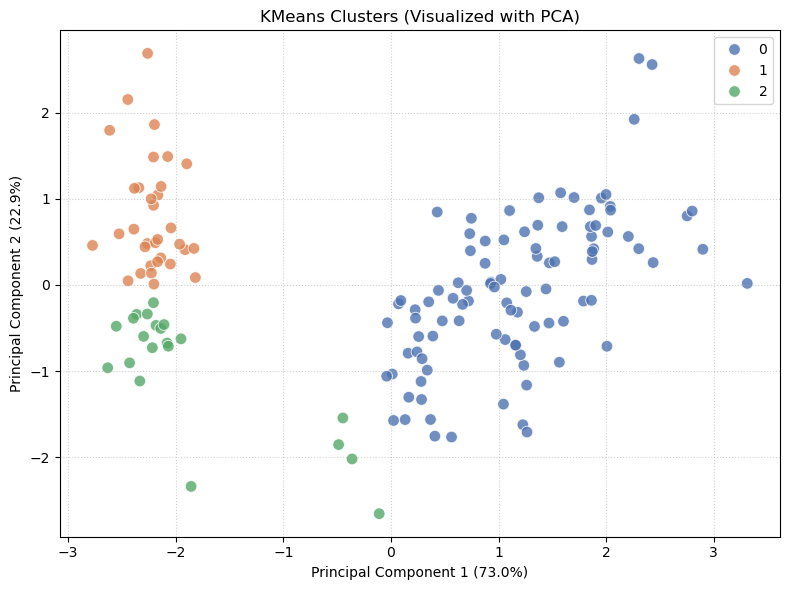

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # CRITICAL FIX: Missing import for iris data

# --- 1. LOAD AND PREPARE DATA ---
iris = load_iris(as_frame=True) # Load the Iris dataset
X = iris.data # The 4 features (sepal length, sepal width, etc.)

# --- 2. BEST PRACTICE: SCALING ---
# KMeans is distance-based, so features must be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA for Visualization (2 components) ---
# PCA is fit on the scaled data
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print('--- PCA Results ---')
print('Explained variance ratio (PC1 and PC2):', pca.explained_variance_ratio_)
print(f'Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.4f}')

# --- 4. KMEANS CLUSTERING ---
# KMeans is fit on the scaled data (the higher dimensional features)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto') 
labels = kmeans.fit_predict(X_scaled) # The cluster assignments (0, 1, or 2)

# --- 5. VISUALIZATION ---
plt.figure(figsize=(8, 6))

# Plot the scaled data in the 2D PCA space, colored by the KMeans labels
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=labels, 
    palette='deep', 
    legend='full',
    s=70, # size of points
    alpha=0.8
)

plt.title('KMeans Clusters (Visualized with PCA)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

## 8️⃣ Pipelines & Hyperparameter Tuning

Use `Pipeline` and `GridSearchCV` to bundle preprocessing and model selection.

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# 1. CHANGE MODEL: Use a Regression Estimator
from sklearn.ensemble import RandomForestRegressor 
# 2. CHANGE METRIC: Import Mean Squared Error (MSE) to use later
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.linear_model import LinearRegression # Simple regression model option

# --- 1. LOAD DATA (Change) ---
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# --- 2. BUILD PIPELINE COMPONENTS ---
# All California Housing features are numerical, so we scale them all.
numeric_features = list(X.columns)
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# --- 3. CREATE FINAL PIPELINE (Change Model) ---
# We'll use the flexible RandomForestRegressor for the tuning example
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reg', RandomForestRegressor(random_state=42)) # Renamed 'reg' (Regressor)
])

# --- 4. DEFINE HYPERPARAMETER GRID ---
param_grid = {
    # Target the 'reg' step of the pipeline
    'reg__n_estimators': [50, 100],
    'reg__max_depth': [5, 10] # Using different max depths for regression
}

# --- 5. EXECUTE GRID SEARCH (Change Metric) ---
# We want to minimize Mean Squared Error (MSE), but GridSearchCV maximizes scoring,
# so we use 'neg_mean_squared_error' (Negative MSE) for maximization.
grid = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', # Use negative MSE for minimization
    n_jobs=-1
)
grid.fit(X, y)

# --- 6. OUTPUT RESULTS ---
print('--- GridSearchCV Results for California Housing (Regression) ---')
print('Best parameters found:', grid.best_params_)

# Convert the negative score back to positive MSE (or RMSE for better interpretability)
best_neg_mse = grid.best_score_
best_mse = -best_neg_mse
best_rmse = best_mse**0.5

print(f'Best CV score (Negative MSE): {best_neg_mse:.4f}')
print(f'Best CV Mean Squared Error (MSE): {best_mse:.4f}')
print(f'Best CV Root Mean Squared Error (RMSE): {best_rmse:.4f}')


--- GridSearchCV Results for California Housing (Regression) ---
Best parameters found: {'reg__max_depth': 10, 'reg__n_estimators': 50}
Best CV score (Negative MSE): -0.4645
Best CV Mean Squared Error (MSE): 0.4645
Best CV Root Mean Squared Error (RMSE): 0.6816


## 9️⃣ Saving & Loading Models

Use `joblib` or `pickle` to persist trained models for later use.

In [32]:
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import io # NEW: Import the I/O library for file-like objects

# --- 1. SETUP: Load Data and Create Splits ---
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Create the splits required for training and testing
# Stratify=y is crucial for balanced classification splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 2. TRAIN THE INITIAL MODEL ---
# Fit a small model using the training data
model_original = RandomForestClassifier(n_estimators=10, random_state=42)
model_original.fit(X_train, y_train)

print("--- Original Model Prediction ---")
print('Original model predicts the first 5 test samples:', 
      model_original.predict(X_test[:5]))

# --- 3. SAVE THE MODEL (Serialization to memory buffer) ---
# Create a BytesIO object which acts like a file in memory.
model_buffer = io.BytesIO()

# Dump the model into the in-memory file object
joblib.dump(model_original, model_buffer)

print("\nModel successfully serialized to an in-memory buffer (like saving to disk).")

# --- 4. LOAD THE MODEL (Deserialization from memory buffer) ---
# CRITICAL STEP: Reset the buffer pointer to the beginning (0) before reading
model_buffer.seek(0) 

# Load the model from the start of the memory buffer
model_loaded = joblib.load(model_buffer)

# --- 5. VERIFICATION: Test the Loaded Model ---
print("\n--- Loaded Model Verification ---")
print('Loaded model predicts the first 5 test samples:', 
      model_loaded.predict(X_test[:5]))

# Check if the predictions are identical
predictions_match = (model_original.predict(X_test) == model_loaded.predict(X_test)).all()
print(f'\nDo predictions from original and loaded models match? {predictions_match}')

--- Original Model Prediction ---
Original model predicts the first 5 test samples: [2 1 1 1 2]

Model successfully serialized to an in-memory buffer (like saving to disk).

--- Loaded Model Verification ---
Loaded model predicts the first 5 test samples: [2 1 1 1 2]

Do predictions from original and loaded models match? True
